In [52]:
from selenium import webdriver
import time
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import font_manager , rc
import platform

In [8]:
link = "https://finance.naver.com/marketindex/exchangeList.nhn"
html = urlopen(link)
bsObject = BeautifulSoup(html, "lxml")
bs = bsObject.select("td.tit>a")

country_index = []

for bs2 in bs:
    country_index.append(bs2.get("href")[-6:])
    
print(country_index)

['USDKRW', 'EURKRW', 'JPYKRW', 'CNYKRW', 'HKDKRW', 'TWDKRW', 'GBPKRW', 'OMRKRW', 'CADKRW', 'CHFKRW', 'SEKKRW', 'AUDKRW', 'NZDKRW', 'CZKKRW', 'CLPKRW', 'TRYKRW', 'MNTKRW', 'ILSKRW', 'DKKKRW', 'NOKKRW', 'SARKRW', 'KWDKRW', 'BHDKRW', 'AEDKRW', 'JODKRW', 'EGPKRW', 'THBKRW', 'SGDKRW', 'MYRKRW', 'IDRKRW', 'QARKRW', 'KZTKRW', 'BNDKRW', 'INRKRW', 'PKRKRW', 'BDTKRW', 'PHPKRW', 'MXNKRW', 'BRLKRW', 'VNDKRW', 'ZARKRW', 'RUBKRW', 'HUFKRW', 'PLNKRW']


In [4]:
len(country_index)

44

In [8]:
exchange_daily_link = "https://finance.naver.com//marketindex/exchangeDailyQuote.nhn??marketindexCd=FX_"  
link_lst = []
for country_link in country_index:
    link = exchange_daily_link + country_link
    link_lst.append(link)
for i in range(len(link_lst)):
    if i > 5: break
    print(link_lst[i])

https://finance.naver.com//marketindex/exchangeDailyQuote.nhn??marketindexCd=FX_USDKRW
https://finance.naver.com//marketindex/exchangeDailyQuote.nhn??marketindexCd=FX_EURKRW
https://finance.naver.com//marketindex/exchangeDailyQuote.nhn??marketindexCd=FX_JPYKRW
https://finance.naver.com//marketindex/exchangeDailyQuote.nhn??marketindexCd=FX_CNYKRW
https://finance.naver.com//marketindex/exchangeDailyQuote.nhn??marketindexCd=FX_HKDKRW
https://finance.naver.com//marketindex/exchangeDailyQuote.nhn??marketindexCd=FX_TWDKRW


In [9]:

# USD 통화에 대해서 테스트 해보기
sample_link = link_lst[0]

page = 1
html = urlopen(sample_link + "&page=" + str(page))
bs = BeautifulSoup(html, "lxml")
bs_select =bs.select("table.tbl_exchange.today tbody tr td")

DATE = []
USDKRW = []

for i,bs_sub in enumerate(bs_select):
  
    if i%9== 0:
        date = bs_sub.get_text()
        DATE.append(date)
    if i%9 == 1:
        exchange = float(bs_sub.get_text().replace("," , ""))
        USDKRW.append(exchange)
    
df = pd.DataFrame({"USDKRW" : USDKRW } , index = DATE)
df.head(10)


,USDKRW
2021.01.29,1117.5
2021.01.28,1118.0
2021.01.27,1105.0
2021.01.26,1105.5
2021.01.25,1102.5
2021.01.22,1105.0
2021.01.21,1101.0
2021.01.20,1101.5
2021.01.19,1102.5
2021.01.18,1107.0


In [10]:
import time
start = time.time()

# USD 통화에 대해서 테스트 해보기
sample_link = link_lst[0]
page = 0
DATE = []
USDKRW = []
    
while(1):
    page += 1
    html = urlopen(sample_link + "&page=" + str(page))
    bs = BeautifulSoup(html, "lxml")
    bs_select =bs.select("table.tbl_exchange.today tbody tr td")

    # 마지막 페이지를 넘어가면 break
    if not len(bs_select): break
    
	# html-table에서 9개의 정보가 행으로 담겨져있다, 여기서 날짜/매매기준율 2가지 정보만 가져옴
    for i,bs_sub in enumerate(bs_select):
        if i%9== 0:
            date = bs_sub.get_text()
            DATE.append(date)
        if i%9 == 1:
            exchange = float(bs_sub.get_text().replace("," , ""))
            USDKRW.append(exchange)

print(" 실행 시간 : {} (초) ".format(time.time() - start))

df = pd.DataFrame({"USDKRW" : USDKRW } , index = DATE)

print("데이터 개수 : " , len(df))


 실행 시간 : 37.590388774871826 (초) 
데이터 개수 :  4177


In [11]:
df.tail(10)

,USDKRW
2004.04.26,1155.0
2004.04.23,1158.3
2004.04.22,1159.7
2004.04.21,1154.8
2004.04.20,1151.4
2004.04.19,1153.6
2004.04.16,1160.1
2004.04.14,1151.3
2004.04.13,1141.1
2004.04.12,1141.8


In [43]:

def get_country_daily_exchange(country):
    
    page = 0
    exchange_daily_link = "https://finance.naver.com/marketindex/exchangeDailyQuote.nhn?marketindexCd=FX_" 
    DATE = []
    EXCHANGE = []
    
    while(1):
        page += 1
        link = exchange_daily_link + country + "&page=" + str(page)
        html = urlopen(link)
        bs = BeautifulSoup(html, "lxml")
        bs_select =bs.select("table.tbl_exchange.today tbody tr td")

        # 마지막 페이지를 넘어가면 break
        if not len(bs_select): break

        # html-table에서 9개의 정보가 행으로 담겨져있다, 여기서 날짜/매매기준율 2가지 정보만 가져옴
        for i,bs_sub in enumerate(bs_select):
            if i%9== 0:
                date = bs_sub.get_text()
                DATE.append(date)
            if i%9 == 1:
                exchange = float(bs_sub.get_text().replace("," , ""))
                EXCHANGE.append(exchange)
    
    return DATE , EXCHANGE



In [28]:
input_country = "USD"
DATE , EXCHANGE = get_country_daily_exchange(input_country)

In [31]:
df = pd.DataFrame({input_country + "KRW" : EXCHANGE} , index = DATE)
df.tail(10)

,USDKRW
2004.04.26,1155.0
2004.04.23,1158.3
2004.04.22,1159.7
2004.04.21,1154.8
2004.04.20,1151.4
2004.04.19,1153.6
2004.04.16,1160.1
2004.04.14,1151.3
2004.04.13,1141.1
2004.04.12,1141.8


In [44]:


import time
from tqdm import tqdm

# # 모든 통화에 대해 스크래핑
def get_all_countries_daily_exchange(country_index):
     
    flag = 0
    i = 0
    for country in tqdm(country_index):
        print(country)
        DATE , EXCHANGE = get_country_daily_exchange(country)
        if not flag: 
            df = pd.DataFrame({country : EXCHANGE} , index = DATE)
            flag = 1
        else:
            new_df = pd.DataFrame({country : EXCHANGE} , index = DATE)
            df = pd.merge(df , new_df , left_index = True , right_index = True , how = "outer")


    df.to_excel("all_countries_exchange.xlsx" , engine="openpyxl")
    print("Saving Successfully")
    return df
    


In [45]:
Exchange_data = get_all_countries_daily_exchange(country_index)

  0%|                                                                                           | 0/44 [00:00<?, ?it/s]

USDKRW


  2%|█▉                                                                                 | 1/44 [00:34<24:59, 34.87s/it]

EURKRW


  5%|███▊                                                                               | 2/44 [01:12<25:21, 36.23s/it]

JPYKRW


  7%|█████▋                                                                             | 3/44 [01:46<24:09, 35.35s/it]

CNYKRW


  9%|███████▌                                                                           | 4/44 [02:23<23:59, 36.00s/it]

HKDKRW


 11%|█████████▍                                                                         | 5/44 [02:56<22:46, 35.03s/it]

TWDKRW


 14%|███████████▎                                                                       | 6/44 [03:30<21:53, 34.56s/it]

GBPKRW


 16%|█████████████▏                                                                     | 7/44 [04:04<21:09, 34.32s/it]

OMRKRW


 18%|███████████████                                                                    | 8/44 [04:19<16:52, 28.14s/it]

CADKRW


 20%|████████████████▉                                                                  | 9/44 [04:52<17:23, 29.82s/it]

CHFKRW


 23%|██████████████████▋                                                               | 10/44 [05:26<17:35, 31.04s/it]

SEKKRW


 25%|████████████████████▌                                                             | 11/44 [06:03<18:02, 32.79s/it]

AUDKRW


 27%|██████████████████████▎                                                           | 12/44 [06:42<18:34, 34.82s/it]

NZDKRW


 30%|████████████████████████▏                                                         | 13/44 [07:18<18:05, 35.03s/it]

CZKKRW


 32%|██████████████████████████                                                        | 14/44 [07:37<15:08, 30.28s/it]

CLPKRW


 34%|███████████████████████████▉                                                      | 15/44 [07:54<12:44, 26.36s/it]

TRYKRW


 36%|█████████████████████████████▊                                                    | 16/44 [08:12<11:06, 23.79s/it]

MNTKRW


 39%|███████████████████████████████▋                                                  | 17/44 [08:29<09:43, 21.61s/it]

ILSKRW


 41%|█████████████████████████████████▌                                                | 18/44 [08:54<09:52, 22.80s/it]

DKKKRW


 43%|███████████████████████████████████▍                                              | 19/44 [09:27<10:43, 25.72s/it]

NOKKRW


 45%|█████████████████████████████████████▎                                            | 20/44 [10:00<11:12, 28.04s/it]

SARKRW


 48%|███████████████████████████████████████▏                                          | 21/44 [10:34<11:26, 29.85s/it]

KWDKRW


 50%|█████████████████████████████████████████                                         | 22/44 [11:10<11:35, 31.63s/it]

BHDKRW


 52%|██████████████████████████████████████████▊                                       | 23/44 [11:43<11:15, 32.16s/it]

AEDKRW


 55%|████████████████████████████████████████████▋                                     | 24/44 [12:17<10:53, 32.67s/it]

JODKRW


 57%|██████████████████████████████████████████████▌                                   | 25/44 [12:46<10:01, 31.64s/it]

EGPKRW


 59%|████████████████████████████████████████████████▍                                 | 26/44 [13:22<09:50, 32.80s/it]

THBKRW


 61%|██████████████████████████████████████████████████▎                               | 27/44 [13:55<09:20, 32.97s/it]

SGDKRW


 64%|████████████████████████████████████████████████████▏                             | 28/44 [14:29<08:52, 33.28s/it]

MYRKRW


 66%|██████████████████████████████████████████████████████                            | 29/44 [15:03<08:22, 33.48s/it]

IDRKRW


 68%|███████████████████████████████████████████████████████▉                          | 30/44 [15:39<07:58, 34.18s/it]

QARKRW


 70%|█████████████████████████████████████████████████████████▊                        | 31/44 [15:56<06:19, 29.16s/it]

KZTKRW


 73%|███████████████████████████████████████████████████████████▋                      | 32/44 [16:14<05:08, 25.71s/it]

BNDKRW


 75%|█████████████████████████████████████████████████████████████▌                    | 33/44 [16:48<05:11, 28.28s/it]

INRKRW


 77%|███████████████████████████████████████████████████████████████▎                  | 34/44 [17:29<05:18, 31.89s/it]

PKRKRW


 80%|█████████████████████████████████████████████████████████████████▏                | 35/44 [18:06<05:00, 33.41s/it]

BDTKRW


 82%|███████████████████████████████████████████████████████████████████               | 36/44 [18:40<04:28, 33.54s/it]

PHPKRW


 84%|████████████████████████████████████████████████████████████████████▉             | 37/44 [19:14<03:56, 33.82s/it]

MXNKRW


 86%|██████████████████████████████████████████████████████████████████████▊           | 38/44 [19:49<03:24, 34.15s/it]

BRLKRW


 89%|████████████████████████████████████████████████████████████████████████▋         | 39/44 [20:22<02:48, 33.76s/it]

VNDKRW


 91%|██████████████████████████████████████████████████████████████████████████▌       | 40/44 [20:50<02:08, 32.21s/it]

ZARKRW


 93%|████████████████████████████████████████████████████████████████████████████▍     | 41/44 [21:17<01:31, 30.42s/it]

RUBKRW


 95%|██████████████████████████████████████████████████████████████████████████████▎   | 42/44 [21:42<00:58, 29.01s/it]

HUFKRW


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 43/44 [22:07<00:27, 27.84s/it]

PLNKRW


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [22:32<00:00, 30.74s/it]


Saving Successfully


In [46]:
df = pd.read_excel("all_countries_exchange.xlsx" , engine="openpyxl" )
df.head(10)

,Unnamed: 0,USDKRW,EURKRW,JPYKRW,CNYKRW,HKDKRW,TWDKRW,GBPKRW,OMRKRW,CADKRW,...,PKRKRW,BDTKRW,PHPKRW,MXNKRW,BRLKRW,VNDKRW,ZARKRW,RUBKRW,HUFKRW,PLNKRW
0,2004.04.12,1141.8,1378.38,1074.13,137.95,146.45,34.86,2092.92,NaN,860.50,...,19.98,19.38,20.32,101.72,397.15,NaN,NaN,NaN,NaN,NaN
1,2004.04.13,1141.1,1370.23,1082.12,137.86,146.38,34.87,2088.33,NaN,853.73,...,19.86,19.35,20.36,101.60,395.53,NaN,NaN,NaN,NaN,NaN
2,2004.04.14,1151.3,1375.23,1072.87,139.10,147.67,35.26,2084.66,NaN,862.01,...,20.15,19.61,20.63,102.38,399.34,NaN,NaN,NaN,NaN,NaN
3,2004.04.16,1160.1,1392.00,1070.20,140.16,148.75,35.23,2080.52,NaN,864.33,...,20.19,19.76,20.79,103.06,399.48,NaN,NaN,NaN,NaN,NaN
4,2004.04.19,1153.6,1391.47,1069.63,139.38,147.92,35.11,2084.90,NaN,859.23,...,20.47,19.55,20.69,102.45,396.84,NaN,NaN,NaN,NaN,NaN
5,2004.04.20,1151.4,1374.08,1065.03,139.11,147.63,35.14,2070.22,NaN,853.46,...,20.13,19.61,20.72,102.35,395.40,NaN,NaN,NaN,NaN,NaN
6,2004.04.21,1154.8,1368.55,1062.18,139.52,148.08,35.18,2055.08,NaN,850.81,...,20.17,19.67,20.76,101.86,395.61,NaN,NaN,NaN,NaN,NaN
7,2004.04.22,1159.7,1369.49,1059.18,140.11,148.69,35.28,2049.42,NaN,851.84,...,20.27,19.72,20.80,102.67,396.28,NaN,NaN,NaN,NaN,NaN
8,2004.04.23,1158.3,1380.00,1058.58,139.94,148.51,35.15,2054.94,NaN,855.09,...,20.21,19.68,20.77,102.10,395.73,NaN,NaN,NaN,NaN,NaN
9,2004.04.26,1155.0,1363.59,1058.27,139.54,148.08,35.07,2048.74,NaN,849.95,...,20.15,19.56,20.73,101.99,396.63,NaN,NaN,NaN,NaN,NaN


In [77]:
import matplotlib.pyplot as plt


# 파일 경로를 입력받아 그래프 출력/저장
def draw_graph(country_list , normalization = True , **option):
    
    df = pd.read_excel("all_countries_exchange.xlsx" , engine = "openpyxl" , index_col= 0)
    
    if option.get("start_date"): start_date = start_date
    else: start_date = 0
    
    if option.get("end_date"): end_date = end_date
    else: end_date = -1
        
    if option.get("normalization"):
        normalization = "True"
        
    # 한글 폰트 문제
    fn_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=fn_name)
    plt.figure(figsize=(16,6))
    
    

    
    for country in country_list:
        x_df = df.index[start_date : end_date]
        y_df = df.loc[x_df][country]
        
        # 정규분포화 
        if normalization:
            nor_y_df = (y_df - y_df.mean())/y_df.std()
            plt.plot(x_df , nor_y_df , label = country)
        else: plt.plot(x_df , y_df , label = country)
     
    
    xticks = []
    len_xticks = 10
    for i in range(len(df.index[start_date : end_date])):
        num_divide = int(len(df)/len_xticks)
        if i%num_divide == 0:
            xticks.append(df.index[i])
    xticks.append(df.index[-1])
    plt.xticks(xticks)
    
    plt.xlabel("기준년월일")
    plt.ylabel("환율 (매매가기준)")
    plt.legend()
    
    
    


C:\Users\Ando\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ando\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


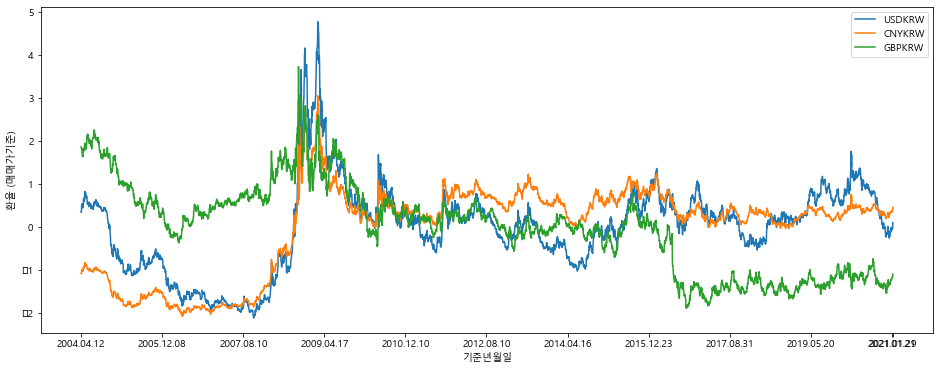

In [78]:
country_list = ["USDKRW" , "CNYKRW" ,"GBPKRW"]

draw_graph(country_list)

In [60]:
df = pd.read_excel("all_countries_exchange.xlsx" , engine = "openpyxl")

In [54]:


df = pd.DataFrame({"name" : [1,2,3] } , index = [1,2,3])
df2 = pd.DataFrame({"name2" : [4,5,3] } , index = [1,5,3])

df3 = pd.merge(df , df2 , left_index = True , right_index = True , how = "outer")
df3

,name,name2
1,1.0,4.0
2,2.0,NaN
3,3.0,3.0
5,NaN,5.0


In [ ]:
import time
start = time.time()
from tqdm.notebook import tqdm

country_index
link_lst

# 한 국가에 대해서 테스트 중인데 상당히 오래걸린다 , 아마 Selenium을 써야할 듯하다

df = pd.DataFrame( [] , columns=country_index)

# 전체 국가에 대해서
date_index = []
for i,link in tqdm(enumerate(link_lst)):
    country_exchange = []
    
    page = 1
    maxpage = 2
    
    if i > 8:
        break
        
    # 한 나라에 대해서
    while(True):
        html = urlopen(link + "&page=" + str(page))
        bs = BeautifulSoup(html, "html.parser")
        bs_select =bs.select("table.tbl_exchange.today tbody tr")
        if not len(bs_select): break

        # 페이지 스크래핑 
        for bs_sub in bs_select:
            bs_sub2 = bs_sub.select("td")
            date = bs_sub2[0].get_text()
            exchange = float(bs_sub2[1].get_text().replace("," , ""))
            if len(date_index) <= len(country_exchange):
                date_index.append(date)
            country_exchange.append(exchange)
        page += 1
  
    if len(df[country_index[0]]) == 0:
        df[country_index[i]] = country_exchange
    else:
        df[country_index[i]][0:len(country_exchange)] = country_exchange

df.index = date_index
df.to_excel("Total_exchange.xlsx")
   
    
print(" 실행 시간 : " + time.time()-start + "  초")


In [ ]:

lst = [[1,2,3],[4,5,6],[7,8,9]]
df = pd.DataFrame(lst)
df.columns = ["first" , "second" , "third"]
df["second"][:2] = [4,1]

In [ ]:
lst = []
df = pd.DataFrame(lst)
df.columns = ["first" , "second" , "third"]

In [ ]:
df = pd.DataFrame( [] , columns=country_index)
lst = [1,2,3]
len(df["USDKRW"])


In [ ]:
df["EURKRW"][1:3] = [4,1]
df

In [ ]:

html = urlopen('https://finance.naver.com/item/main.nhn?code=005930')
bsObject = BeautifulSoup(html, "html.parser")

meta_data = []


bs = bsObject.select("dl.blind dd")
print(bs)
for cover in bsObject.find_all('dl' , {"class" : "blind"}):
    print(cover)
    data = []
    for cover2 in cover.find_all('dd'):
        data.append(cover2.get_text())
        print("//")
        print(cover2)
    meta_data.append(data)
print(meta_data)

In [ ]:

driver = webdriver.Chrome("./chromedriver.exe")
driver.get("https://finance.naver.com/item/sise_day.nhn?code=035720")
driver.page_source
a = driver.find_elements_by_css_selector("span.tah.p10.gray03")
b = driver.find_elements_by_css_selector("span.tah.p11")


In [ ]:
a

In [ ]:

## Time.sleep 안해도 잘되네..?? 인스타그램은 사진이라 그런가

driver = webdriver.Chrome("./chromedriver.exe")

prices = []
date = []

for page in range(1,11):
    url = "https://finance.naver.com/item/sise_day.nhn?code=035720" + "&page=" + str(page)
    driver.get(url)
    date_sel = driver.find_elements_by_css_selector("span.tah.p10.gray03")
    price_sel= driver.find_elements_by_css_selector("span.tah.p11")
    for d in date_sel:
        date.append(d.text)

    for i,p in enumerate(price_sel):
        if i% 6 == 0:
            prices.append(int(p.text.replace(",","")))
            
df = pd.DataFrame({"price (종가)" : prices})
df.index = date
plt.plot(df["price (종가)"].values)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df["price (종가)"].values)
df["price (종가)"]

In [ ]:
plt.plot(df["price (종가)"].values[0:10])

In [ ]:
from matplotlib import font_manager , rc
import platform

# matplot 에서 한글 폰트 사용
if platform.system() == "Windows":
    path =  "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font' , family =  font_name)

xticks = []
for i in range(len(df)):
    num_divide = 10
    if i%10 == 0:
        xticks.append(df.index[i])
plt.xticks(xticks)

# 좀 더 그럴듯하게 그려보기
plt.figure(figsize=(12,4))
plt.plot(df.index , df["price (종가)"])
plt.title("주식 가격 그래프")
plt.xlabel("기준 년월")
plt.ylabel("주식 가격 (종가 기준)")

plt.show()

In [ ]:


def get_stock_prices(code_number):

    driver = webdriver.Chrome("./chromedriver.exe")
    url = "https://finance.naver.com/item/main.nhn?code=" + code_number
    driver.get(url)
    if driver.find_elements_by_css_selector("div.error_content"):
        print("잘못된 코드번호 입니다")
        return
    
    stock_name = driver.find_element_by_css_selector("div.wrap_company a").text
    print("코드 종목 : {} / 코드 번호 : {}".format(stock_name , code_number))
    
    
    # 스크래핑
    page = 0
    prices = []
    date = []
    pv_date = ""
    while(1):
        page += 1
        url = "https://finance.naver.com/item/sise_day.nhn?code=" + code_number + "&page=" + str(page)
        driver.get(url)
        date_sel = driver.find_elements_by_css_selector("span.tah.p10.gray03")
        price_sel= driver.find_elements_by_css_selector("span.tah.p11")

        now_date = date_sel[0].text
        if pv_date == now_date: break
        else:
            pv_date = now_date
        for d in date_sel:
            date.append(d.text)

        for i,p in enumerate(price_sel):
            if i% 6 == 0:
                prices.append(int(p.text.replace(",","")))
    prices.reverse()
    df = pd.DataFrame({"price(종가)" : prices})
    df.index = date
    save_name = stock_name + " stock price.xlsx"
    df.to_excel(save_name , engine="openpyxl")
    print("Succesful Saving")            
    return


get_stock_prices("035720")      


In [ ]:
code_number = "005930"
driver = webdriver.Chrome("./chromedriver.exe")
url = "https://finance.naver.com/item/sise_day.nhn?code=035720&page=1000"
driver.get(url)

page = 500
prices = []
date = []

pv_date = ""
while(1):
    page += 1
    url = "https://finance.naver.com/item/sise_day.nhn?code=" + code_number + "&page=" + str(page)
    driver.get(url)
    date_sel = driver.find_elements_by_css_selector("span.tah.p10.gray03")
    price_sel= driver.find_elements_by_css_selector("span.tah.p11")
    
    now_date = date_sel[0].text
    if pv_date == now_date: break
    else:
        pv_date = now_date
    for d in date_sel:
        date.append(d.text)

    for i,p in enumerate(price_sel):
        if i% 6 == 0:
            prices.append(int(p.text.replace(",","")))
            

df = pd.DataFrame({"price(종가)" : prices})
df.index = date

df


In [ ]:
a = [1,3,5]
a.reverse()
a

In [ ]:
    prices = []
    date = []

    for page in range(1,11):
        url = "https://finance.naver.com/item/sise_day.nhn?code=035720" + "&page=" + str(page)
        driver.get(url)
        date_sel = driver.find_elements_by_css_selector("span.tah.p10.gray03")
        price_sel= driver.find_elements_by_css_selector("span.tah.p11")
        for d in date_sel:
            date.append(d.text)

        for i,p in enumerate(price_sel):
            if i% 6 == 0:
                prices.append(int(p.text.replace(",","")))
            
df = pd.DataFrame({"price (종가)" : prices})
df.index = date
plt.plot(df["price (종가)"].values)

In [ ]:
df.index
len(df)

In [ ]:
html = urlopen('https://finance.naver.com/marketindex/exchangeDailyQuote.nhn?marketindexCd=FX_USDKRW')
bsObject = BeautifulSoup(html, "lxml")
print(bsObject)


In [ ]:
bs = bsObject.select("table")
bs

In [ ]:
bs1

In [ ]:
def get_stock_prices(code_number):

    driver = webdriver.Chrome("./chromedriver.exe")
    url = "https://finance.naver.com/item/main.nhn?code=" + code_number
    driver.get(url)
    if driver.find_elements_by_css_selector("div.error_content"):
        print("잘못된 코드번호 입니다")
        return
    
    stock_name = driver.find_element_by_css_selector("div.wrap_company a").text
    print("코드 종목 : {} / 코드 번호 : {}".format(stock_name , code_number))

In [ ]:
get_stock_prices("000000")

In [ ]:
get_stock_prices("005930")

In [ ]:

# 파일 경로를 입력받아 그래프 출력/저장
def draw_graph(savefile = ""):
    
    # 로드
    df = pd.read_xlsx(savefile)
    
    # matplot 에서 한글 폰트 사용
    if platform.system() == "Windows":
        path =  "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font' , family =  font_name)

    xticks = []
    for i in range(len(df)):
        num_divide = 10
        if i%10 == 0:
            xticks.append(df.index[i])
    plt.xticks(xticks)

    # 좀 더 그럴듯하게 그려보기
    plt.figure(figsize=(12,4))
    plt.plot(df.index , df["price (종가)"])
    plt.title("주식 가격 그래프")
    plt.xlabel("기준 년월")
    plt.ylabel("주식 가격 (종가 기준)")

    plt.show()
    plt.savefile(".png")

In [ ]:

df = pd.read_xlsx(savefile)
df[-1]